In [3]:
library(readxl)

## Tarea 1

In [23]:
# Read the Lab1_Datos.xslx file
tarea1 <- read_excel("Lab2_Datos.xlsx", sheet="Tarea_1")

In [24]:
print(tarea1)

# A tibble: 6 × 2
    Año    Yt
  <dbl> <dbl>
1     1  80.2
2     2  78  
3     3  74.2
4     4  76.5
5     5  78.4
6     6  72.6


#### 1. Calcula las predicciones para el período extra muestral con los métodos:
##### (a) de la media simple

In [32]:
values <- tarea1[c(1:4),]
media <- mean(values$Yt)

print(media)

[1] 77.225


Las predicciones del periodo extramuestral serian ambas 77.225

##### (b) de las medias móviles (k=4)

En este caso, como el periodo muestral tiene justamente 4 muestras, las predicciones de este metodo para ambos años del periodo extramuestral, tambien serian 77.225

##### (c) el método AES (a = 0,3)

In [33]:
if (!"aes" %in% names(tarea1)) {
  tarea1$aes <- NA  # Inicializa la columna con NA
  tarea1$aes[2] <- tarea1$Yt[1]
    
}

for (i in 3:(nrow(tarea1)-1)) {
    tarea1$aes[i] <- (0.7 * tarea1$aes[i - 1] + 0.3 * tarea1$Yt[i - 1])
}
tarea1$aes[6] <- tarea1$aes[5]

In [34]:
head(tarea1)

Año,Yt,aes
<dbl>,<dbl>,<dbl>
1,80.2,NA
2,78.0,80.2000
3,74.2,79.5400
4,76.5,77.9380
5,78.4,77.5066
6,72.6,77.5066


La prediccion para ambas muestras extramuestrales seria de 77.5066

#### 2. Haz el gráfico conjunto de la ST y cada predicción (un gráfico distinto para cada predicción estimada).

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


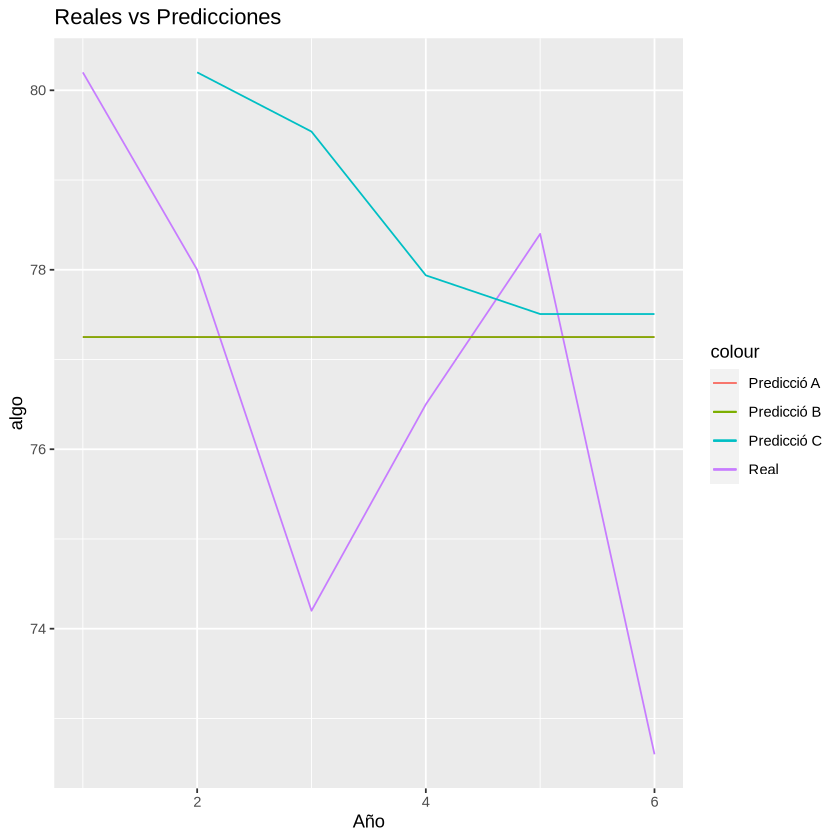

In [35]:
library(ggplot2)

ggplot(tarea1, aes(x = Año)) +
  geom_line(aes(y = Yt, colour = "Real")) +
  geom_line(aes(y = 77.25, colour = "Predicció A")) +
  geom_line(aes(y = 77.25, colour = "Predicció B")) +
  geom_line(aes(y = aes, colour = "Predicció C")) +
  labs(title = "Reales vs Predicciones", y = "algo")

Por feo que sea el grafico, lo que vemos es lo dicho, tanto la prediccion del apartado A como B nos daban el mismo valor de 77.225 mientras que el metodo AES daba un valor de 77.506. Estos valores son constantes ya que dada la naturaleza de lo solicitado tanto el metodo A como el B resultaran constantes, en el caso del metodo C, el AES observamos una variacion al haberlo realizado para cada muestra.

#### 3. ¿Cuál de los tres métodos proporcionar mejores predicciones? ¿Qué capacidad predictiva tiene el mejor de los tres métodos?

Tanto el metodo A como el B, es decir, medias simples y medias mobiles, nos ofrecen el mismo resultado, en cambio el AES ofrece un resultado que se adapta mas a la realidad de nuestros datos ofreciendo una prediccion bastante acertada para el primer año del periodo extramuestral. Aqui me arriesgaria a decir que el AES es mejor.

In [36]:
EAM <- 0
ECM <- 0

for (x in 5:6) {
  EAM <- EAM + abs(tarea1$Yt[x] - tarea1$aes[x])
  ECM <- ECM + (tarea1$Yt[x] - tarea1$aes[x])^2
}

EAM <- EAM / 2
ECM <- ECM / 2

print(EAM)
print(ECM)

[1] 2.9
[1] 12.43644


## Tarea 2

In [66]:
tarea2 <- read_excel("Lab2_Datos.xlsx", sheet="Tarea_2")
names(tarea2) <- c("Año", "t", "Yt")
tarea2 <- tarea2[-c(1:3),]
tarea2$Yt <- as.numeric(tarea2$Yt)
print(tarea2)

New names:
• `` -> `...2`
• `` -> `...3`


# A tibble: 8 × 3
  Año       t    Yt
  <chr> <dbl> <dbl>
1 2003      1    49
2 2004      2    50
3 2005      3    51
4 2006      4    57
5 2007      5    59
6 2008      6    62
7 2009     NA    62
8 2010     NA    68


#### 1.Tomando como período muestral el comprendido entre 2003 y 2008, calcula las predicciones para los años 2009 y 2010 utilizando el método del alisado exponencial de Holt con alpha = 0,6 y gamma = 0,4 , sabiendo que t2006 = 61.779 y beta2006 = 2.421

In [67]:
t <- 61.779
b <- 2.421
alpha <- 0.6
gamma <- 0.4

if (!"predHolt" %in% names(tarea2)) {
  tarea2$predHolt <- NA  # Inicializa la columna con NA    
}

if (!"T" %in% names(tarea2)) {
  tarea2$T <- NA  # Inicializa la columna con NA    
}

if (!"beta" %in% names(tarea2)) {
  tarea2$beta <- NA  # Inicializa la columna con NA    
}

tarea2$T[4] <- t
tarea2$beta[4] <- b
#tarea2$predHolt[5] <- t + b

print(tarea2)

# A tibble: 8 × 6
  Año       t    Yt predHolt     T  beta
  <chr> <dbl> <dbl> <lgl>    <dbl> <dbl>
1 2003      1    49 NA        NA   NA   
2 2004      2    50 NA        NA   NA   
3 2005      3    51 NA        NA   NA   
4 2006      4    57 NA        61.8  2.42
5 2007      5    59 NA        NA   NA   
6 2008      6    62 NA        NA   NA   
7 2009     NA    62 NA        NA   NA   
8 2010     NA    68 NA        NA   NA   


In [65]:
calc_T <- function(Yt, YtPrev) { 
  output <- 0.6 * Yt + 0.4 * YtPrev
  return (output)
}

calc_beta <- function(T, TPrev, betaPrev) { 
  output <- 0.4 * (T - TPrev)  + 0.6 * betaPrev
  return (output)
}

In [68]:
for (x in 5:6) {
  tarea2$T[x] <- calc_T(tarea2$Yt[x], tarea2$Yt[x - 1])
  tarea2$beta[x] <- calc_beta(tarea2$T[x], tarea2$T[x - 1], tarea2$beta[x - 1])
  tarea2$predHolt[x] <- tarea2$T[x - 1] + tarea2$beta[x - 1]
}

print(tarea2)

# A tibble: 8 × 6
  Año       t    Yt predHolt     T    beta
  <chr> <dbl> <dbl>    <dbl> <dbl>   <dbl>
1 2003      1    49     NA    NA   NA     
2 2004      2    50     NA    NA   NA     
3 2005      3    51     NA    NA   NA     
4 2006      4    57     NA    61.8  2.42  
5 2007      5    59     64.2  58.2  0.0210
6 2008      6    62     58.2  60.8  1.05  
7 2009     NA    62     NA    NA   NA     
8 2010     NA    68     NA    NA   NA     


In [69]:
for (x in 1:2) {
  tarea2$predHolt[6 + x] <- tarea2$T[6] + tarea2$beta[6]*x
}

print(tarea2)

# A tibble: 8 × 6
  Año       t    Yt predHolt     T    beta
  <chr> <dbl> <dbl>    <dbl> <dbl>   <dbl>
1 2003      1    49     NA    NA   NA     
2 2004      2    50     NA    NA   NA     
3 2005      3    51     NA    NA   NA     
4 2006      4    57     NA    61.8  2.42  
5 2007      5    59     64.2  58.2  0.0210
6 2008      6    62     58.2  60.8  1.05  
7 2009     NA    62     61.9  NA   NA     
8 2010     NA    68     62.9  NA   NA     


#### 2. ¿Para qué tipo de serie temporal es adecuado este método de predicción?

El método de alisado exponencial de Holt es adecuado para series temporales que presentan tendencia pero no estacionalidad como por ejemplo series que muestran una tendencia lineal a lo largo del tiempo, como podria ser la inflacion.

#### 3. Las predicciones obtenidas para el mismo período a partir de otro método han sido de 65 y 70 Euros respectivamente, ¿cuál de los dos métodos resulta más adecuado? ¿Cuál es la capacidad predictiva del mejor de los dos métodos?

##### Error Holt

In [71]:
EAM <- 0
ECM <- 0

for (x in 7:8) {
  EAM <- EAM + abs(tarea2$Yt[x] - tarea2$predHolt[x])
  ECM <- ECM + (tarea2$Yt[x] - tarea2$predHolt[x])^2
}

EAM <- EAM / 2
ECM <- ECM / 2

print(EAM)
print(ECM)

[1] 2.6211
[1] 12.98936


##### Error otro metodo

In [72]:
EAM <- 0
ECM <- 0

EAM <- EAM + abs(tarea2$Yt[7] - 65)
ECM <- ECM + (tarea2$Yt[7] - 65)^2

EAM <- EAM + abs(tarea2$Yt[8] - 70)
ECM <- ECM + (tarea2$Yt[8] - 70)^2

EAM <- EAM / 2
ECM <- ECM / 2

print(EAM)
print(ECM)

[1] 2.5
[1] 6.5


##### Respuesta

A juzgar por los resultados obtenidos, el nuevo metodo parece adaptarse mejor a los resultados, resultando en una mejor capacidad predictiva.